In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [45]:
import sys
!{sys.executable} -m pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [46]:
# Downloads 1 year worth of price data
def download(symbol, start=None):
    delta = datetime.timedelta(days=365)
    if not start:
        start = datetime.datetime(2000,1,1)

    return yf.download(symbol, start=start, end=start+delta)['Adj Close']


In [90]:
download('^SPX', datetime.datetime(2020,1,1))

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
2020-01-08    3253.050049
                 ...     
2020-12-23    3690.010010
2020-12-24    3703.060059
2020-12-28    3735.360107
2020-12-29    3727.040039
2020-12-30    3732.040039
Name: Adj Close, Length: 252, dtype: float64

Get the list of current S&P 500 companies

In [48]:
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())


  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  


Download the historical price data (Adj Close) and construct the design matrix

In [49]:
def construct_data(start, filename):
    df_spx = pd.DataFrame()
    for item in tickers['Symbol']:
        stock = download(item, start)
        df_spx = pd.concat((df_spx, stock.rename(item)), axis=1)
    df_spx.to_csv(filename)
    return df_spx


In [50]:
filename = 'spx_adj_close.csv'
try:
    df_spx = pd.read_csv(filename, index_col=0)
except FileNotFoundError:
    df_spx = construct_data(datetime.datetime(2020,1,1), filename)

In [51]:

# Clean the data
df_spx = df_spx.reset_index(drop=True)
df_spx.fillna(0, inplace=True)
df_spx = df_spx.loc[(df_spx!=0).any(axis=1)]
df_spx = df_spx.loc[:, (df_spx != 0).all(axis=0)]
df_spx


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,119.836891,44.004040,80.490295,73.511124,196.918167,334.429993,49.099998,17.447662,47.664455,83.502014,...,24.862421,18.037565,192.425278,140.598831,55.022358,75.651695,94.008141,259.140015,140.247604,129.823135
1,118.804970,43.617149,79.509056,72.813332,196.590240,331.809998,48.599998,17.247314,47.333881,82.161331,...,24.904722,18.114357,192.472382,138.513367,55.286968,76.097008,93.713707,256.049988,139.880997,129.842484
2,118.918144,43.893501,79.925598,73.387993,195.306503,333.709991,48.389999,17.447662,47.199867,82.404213,...,24.853968,18.352400,192.707870,138.239227,55.207581,75.604332,93.658493,258.010010,139.072586,128.845657
3,118.438812,43.598724,79.481277,72.969315,191.089844,333.390015,48.250000,17.508640,46.753155,82.656815,...,24.693233,18.352400,192.312241,138.895203,55.092915,75.320099,93.824097,256.470001,138.950394,129.281143
4,120.256287,43.534241,79.805260,73.486481,191.464661,337.869995,47.830002,17.473797,46.896103,83.472878,...,24.786293,18.068285,192.528885,139.766602,55.039989,75.575897,93.989738,247.639999,140.614197,129.000534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,121.017647,51.819920,101.035461,89.475456,245.103210,496.910004,91.550003,21.164495,39.971607,114.695503,...,28.947794,17.305185,198.851501,113.837593,58.215801,95.736229,100.149780,379.739990,140.929733,155.592056
248,121.386284,52.167824,101.881737,89.458138,244.969910,499.859985,91.809998,20.966276,40.256268,114.705254,...,29.154501,17.296844,201.698761,112.939140,58.505466,96.235397,100.853149,376.890015,141.412949,156.438843
249,121.518433,52.299465,101.355179,89.622749,247.235840,498.950012,91.599998,20.993307,40.329720,115.213730,...,29.033928,16.796453,198.013458,114.005440,59.130093,96.350586,102.953865,382.589996,141.071854,158.064346
250,120.920265,51.443798,101.862930,90.705673,245.407883,502.109985,90.620003,21.002317,40.173622,114.627052,...,28.706636,16.746412,197.870636,112.860146,59.220608,95.525040,102.644363,378.040009,144.444901,158.774948


Calculate for the returns matrix R

In [52]:

R = df_spx.pct_change().fillna(0)
R.head()


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.008611,-0.008792,-0.012191,-0.009492,-0.001665,-0.007834,-0.010183,-0.011483,-0.006935,-0.016056,...,0.001701,0.004257,0.000245,-0.014833,0.004809,0.005886,-0.003132,-0.011924,-0.002614,0.000149
2,0.000953,0.006336,0.005239,0.007892,-0.006530,0.005726,-0.004321,0.011616,-0.002831,0.002956,...,-0.002038,0.013141,0.001223,-0.001979,-0.001436,-0.006474,-0.000589,0.007655,-0.005779,-0.007677
3,-0.004031,-0.006716,-0.005559,-0.005705,-0.021590,-0.000959,-0.002893,0.003495,-0.009464,0.003065,...,-0.006467,0.000000,-0.002053,0.004745,-0.002077,-0.003759,0.001768,-0.005969,-0.000879,0.003380
4,0.015345,-0.001479,0.004076,0.007087,0.001961,0.013438,-0.008705,-0.001990,0.003058,0.009873,...,0.003769,-0.015481,0.001127,0.006274,-0.000961,0.003396,0.001765,-0.034429,0.011974,-0.002171


Calculate standardized returns Y

In [53]:
Y = ((R - R.mean(axis=0))/R.std(axis=0)).fillna(0)
Y.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,-0.013517,-0.037839,-0.050216,-0.049953,-0.046086,-0.067169,-0.084386,-0.036231,-0.000175,-0.066267,...,-0.035951,-0.012484,-0.016320,-0.010408,-0.024792,-0.048077,-0.026058,-0.065528,-0.019108,-0.045931
1,-0.379139,-0.404553,-0.542751,-0.481809,-0.109370,-0.326307,-0.350051,-0.349852,-0.189594,-0.762148,...,0.002977,0.092830,-0.006780,-0.283916,0.170807,0.154474,-0.138560,-0.446829,-0.101921,-0.039880
2,0.026931,0.226425,0.161449,0.309107,-0.294235,0.122239,-0.197113,0.281033,-0.077502,0.061858,...,-0.082579,0.312591,0.031361,-0.046902,-0.083195,-0.270860,-0.047222,0.179252,-0.202199,-0.357673
3,-0.184662,-0.317947,-0.274819,-0.309503,-0.866533,-0.098886,-0.159863,0.059222,-0.258660,0.066593,...,-0.183918,-0.012484,-0.096327,0.077092,-0.109269,-0.177442,0.037454,-0.256394,-0.046943,0.091314
4,0.638039,-0.099528,0.114473,0.272492,0.028452,0.377318,-0.311475,-0.090584,0.083330,0.361642,...,0.050274,-0.395445,0.027582,0.105278,-0.063865,0.068785,0.037357,-1.166470,0.360237,-0.134068


Construct the correlation matrix

In [54]:
def consrtuct_correlation_matrix(Y, filename):
    p = pd.DataFrame(columns=Y.columns, index=Y.columns)
    for i in Y.columns:
        for j in Y.columns:
            # print(Y[i].sum())
            p[i][j] = ((Y[i] * Y[j]).sum())
    p.head(100)
    p.to_csv(filename)
    return p


In [55]:
filename_corr = 'correlation_matrix.csv'
try:
    p = pd.read_csv(filename_corr, index_col=0)
except FileNotFoundError:
    p = consrtuct_correlation_matrix(Y, filename_corr)
p.dropna(inplace=True)
p.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
MMM,251.000000,168.405950,153.627747,132.005021,167.292474,104.326440,95.655049,133.501426,146.511284,153.779918,...,179.787561,126.304981,137.096244,116.965458,143.206040,188.227017,157.730064,166.840029,149.357560,143.250397
AOS,168.405950,251.000000,114.580098,96.114010,129.642929,103.065615,84.488275,118.137406,125.432216,136.082705,...,150.369007,96.416307,103.766175,114.658813,119.372912,161.163225,115.325623,151.510823,103.507352,111.448989
ABT,153.627747,114.580098,251.000000,156.482001,167.596654,143.794851,126.516787,82.923617,109.394385,180.137425,...,148.959895,81.577946,144.514425,59.093258,170.151931,149.926382,124.748170,147.794553,106.669606,178.442249
ABBV,132.005021,96.114010,156.482001,251.000000,156.122847,135.823359,110.163324,107.261538,122.391355,154.869301,...,128.724817,128.046790,125.793400,93.277452,124.645807,127.942400,118.594183,131.736183,119.785068,163.097729
ACN,167.292474,129.642929,167.596654,156.122847,251.000000,176.037086,130.380936,159.619791,143.924798,181.587033,...,177.438693,138.636619,168.983700,121.550053,153.409430,173.686207,162.067628,177.356673,160.638599,178.245795


Calculate the Principal Components of the correlation matrix

In [110]:
def pca(X):
    l, w_prime = np.linalg.eigh(X)
    sorted_indices = np.argsort(l)[::-1]
    l = l[sorted_indices]
    w_prime = w_prime[:, sorted_indices]
    X_rotated = np.dot(X, w_prime)
    variance_explained = l / np.sum(l)
    return X_rotated, w_prime, variance_explained, l


In [111]:
X_rotated, w_prime, variance_explained, l = pca(p)

Plot of the eigenvalues vs explained variance

Text(0, 0.5, 'variance explained')

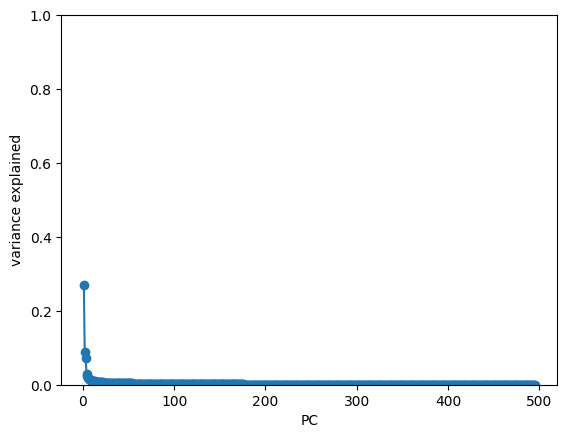

In [112]:
plt.plot(range(1, len(variance_explained)+1), variance_explained, 'o-')
plt.ylim(0,1)
plt.xlabel('PC')
plt.ylabel('variance explained')

Plot the Density of States

Text(0.5, 0, 'Density Of States')

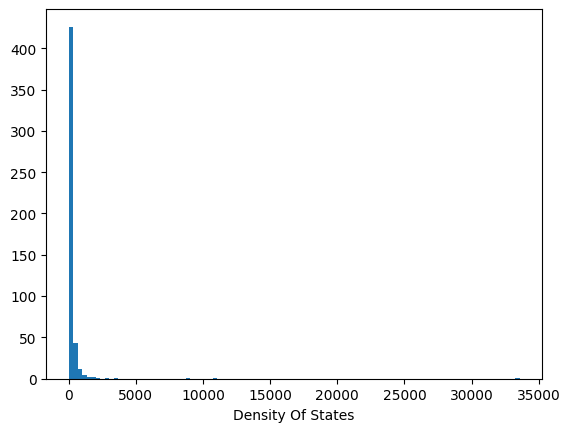

In [113]:
plt.hist(l, bins=100)
plt.xlabel('Density Of States')

Calculate the Eigenportfolio Returns

In [114]:
F = pd.DataFrame(w_prime)
F = F.divide(R.std(axis=0).to_numpy(), axis = 1)
print(F)
print(R)

F = F @ R.T.to_numpy()
F = F.T
# print(F)


          0         1         2         3         4         5         6    \
0    3.350088  0.561667 -5.219486  3.271779 -8.304727 -3.559129  2.363923   
1    4.832584  0.024732 -1.025111  5.553874  2.502718 -2.982074 -0.632543   
2    1.468777 -4.327525 -0.078907  2.776351  1.494767  2.784701 -1.630662   
3    2.641511 -1.219342 -1.596658  1.179206  0.883317  6.343973  1.237301   
4    4.719117 -3.195295 -0.047419  1.664991  0.354006  0.879646  2.329195   
..        ...       ...       ...       ...       ...       ...       ...   
490  5.360163 -0.485524  1.005156  5.276688  2.077619 -4.024489  0.734721   
491  3.962188 -1.339387 -1.365884 -2.261866  2.360511 -1.389592  2.107306   
492  4.009952 -2.161481  4.520636  1.667941 -1.751375 -1.581058 -1.426774   
493  4.082491 -0.144552 -0.313584 -6.088925  3.645045  1.417895  0.620990   
494  2.935198 -5.080634  1.062644  1.341660  3.391801  1.898569  1.500700   

          7         8         9    ...       485        486       487  \
0 

Calculate SPX weighted returns

In [95]:
spx_market = download('^SPX', datetime.datetime(2020,1,1))
R_market = spx_market.pct_change().fillna(0).reset_index(drop=True)
R_market.head()


[*********************100%%**********************]  1 of 1 completed


0    0.000000
1   -0.007060
2    0.003533
3   -0.002803
4    0.004902
Name: Adj Close, dtype: float64

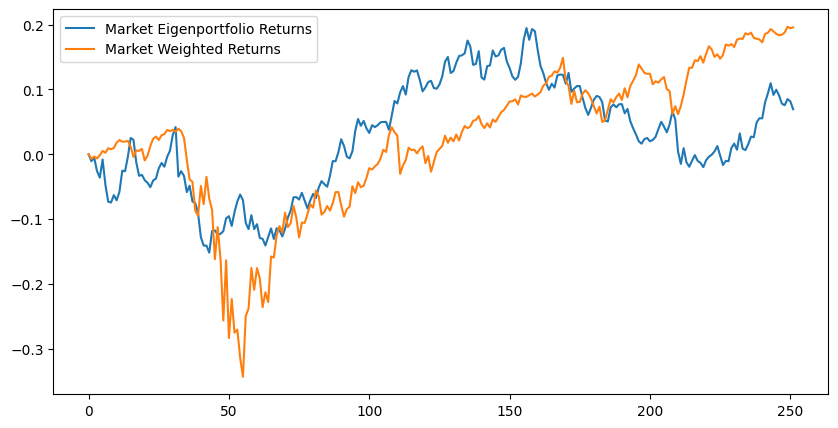

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(F[0].cumsum()/50,  label="Market Eigenportfolio Returns")
ax.plot(R_market.cumsum(), label = "Market Weighted Actual Returns")
plt.legend()

In [63]:
import matplotlib.ticker as tck
def plot_eigenportfolio(n):
    E = pd.DataFrame(w_prime)
    E.columns = R.columns
    E = E.sort_values(n,axis=1, ascending=False)
    fig, ax = plt.subplots(1,1, figsize=(15,5), layout='constrained')
    ax.grid(visible=True,which='major')
    major_ticks_x = [x for x in range(len(E.columns))][::5]
    major_labels_x = E.columns[::5]
    ax.set_xticks(major_ticks_x)
    ax.set_xticklabels(major_labels_x, rotation=90)
    ax.plot(E.columns,E.iloc[n])
    ax.set_xlabel(f'Eigenvector {n}')
    plt.hlines(0,0,len(E.columns), colors='black')
    print('Top 10 Stocks')
    list10 = tickers.loc[tickers['Symbol'].isin(E.columns[:10])][['Symbol','Security','GICS Sector']]
    print(list10)

    print('\nBottom 10 Stocks')
    list10 = tickers.loc[tickers['Symbol'].isin(E.columns[-10:])][['Symbol','Security','GICS Sector']]
    print(list10)


Plot the first Eigenvector

Top 10 Stocks
    Symbol                    Security             GICS Sector
7      AES             AES Corporation               Utilities
43     ADM      Archer-Daniels-Midland        Consumer Staples
75    AVGO               Broadcom Inc.  Information Technology
84     CPB       Campbell Soup Company        Consumer Staples
101    CRL  Charles River Laboratories             Health Care
147   DXCM                      Dexcom             Health Care
156    DOW                    Dow Inc.               Materials
174   EPAM                EPAM Systems  Information Technology
190   FFIV                    F5, Inc.  Information Technology
280   KLAC             KLA Corporation  Information Technology

Bottom 10 Stocks
    Symbol                   Security  GICS Sector
52     AVB      AvalonBay Communities  Real Estate
68      BX                 Blackstone   Financials
86     CAH            Cardinal Health  Health Care
92    CBOE        Cboe Global Markets   Financials
109   CINF       Cin

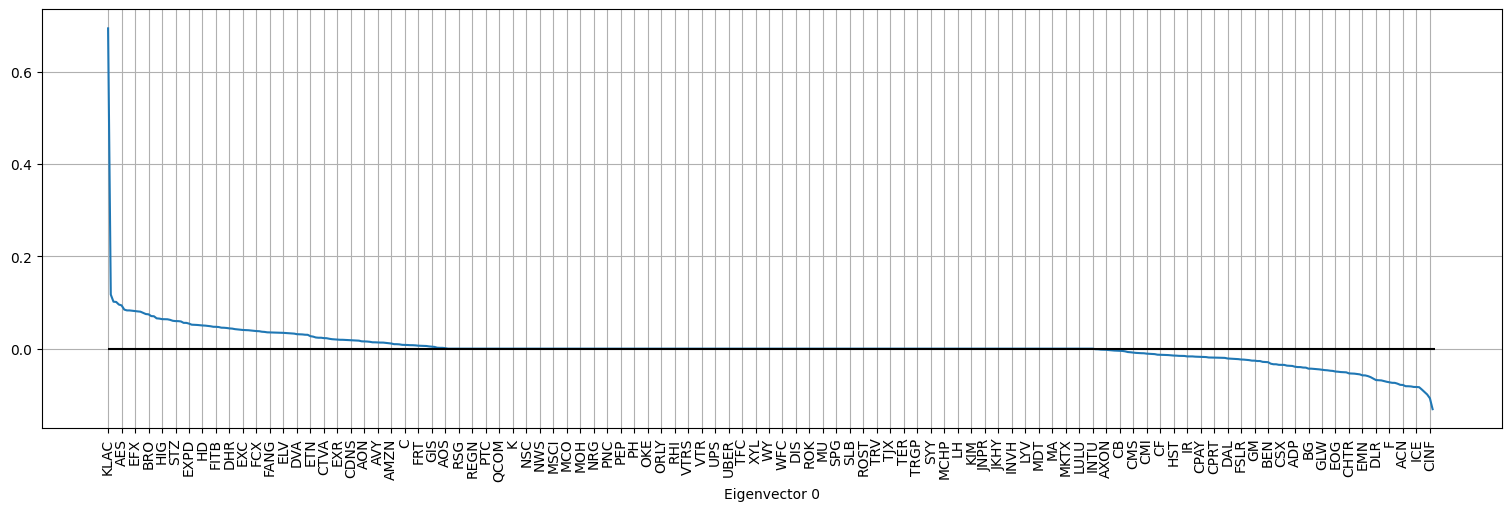

In [64]:
plot_eigenportfolio(0)

Plot Second Eigenvector

Top 10 Stocks
    Symbol                  Security  GICS Sector
23    AMCR                     Amcor    Materials
38     APA           APA Corporation       Energy
48     ATO              Atmos Energy    Utilities
113    CFG  Citizens Financial Group   Financials
115    CME                 CME Group   Financials
124     ED       Consolidated Edison    Utilities
139    DHR       Danaher Corporation  Health Care
159    DUK               Duke Energy    Utilities
360   PCAR                    Paccar  Industrials
502    ZTS                    Zoetis  Health Care

Bottom 10 Stocks
    Symbol                 Security             GICS Sector
6      AMD   Advanced Micro Devices  Information Technology
44    ANET          Arista Networks  Information Technology
58      BK  Bank of New York Mellon              Financials
60     BAX     Baxter International             Health Care
111   CSCO                    Cisco  Information Technology
112      C                Citigroup              Financial

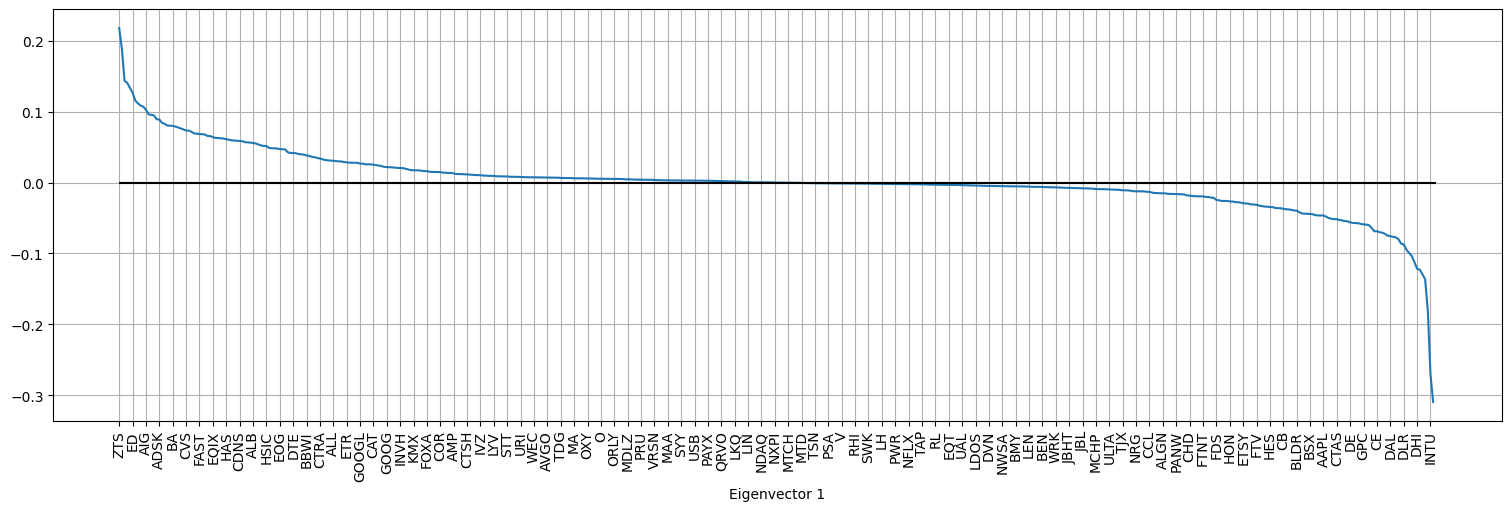

In [65]:
plot_eigenportfolio(1)

Plot Third Eigenvector

Top 10 Stocks
    Symbol                  Security             GICS Sector
161    EMN  Eastman Chemical Company               Materials
173    EOG             EOG Resources                  Energy
188    EXR       Extra Space Storage             Real Estate
209   GRMN                    Garmin  Consumer Discretionary
219    GPC     Genuine Parts Company  Consumer Discretionary
229   HSIC              Henry Schein             Health Care
236    HON                 Honeywell             Industrials
251     IR            Ingersoll Rand             Industrials
499    YUM               Yum! Brands  Consumer Discretionary
502    ZTS                    Zoetis             Health Care

Bottom 10 Stocks
    Symbol                Security             GICS Sector
85     COF             Capital One              Financials
105    CMG  Chipotle Mexican Grill  Consumer Discretionary
115    CME               CME Group              Financials
146    DVN            Devon Energy                  Energy
14

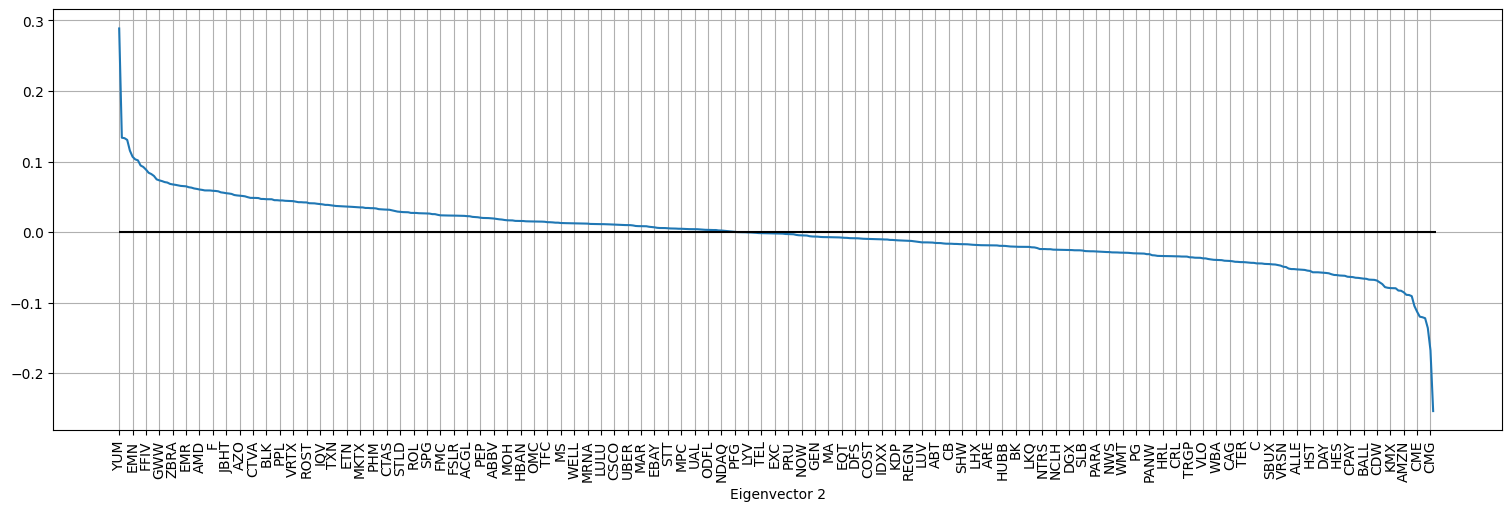

In [66]:
plot_eigenportfolio(2)

Repeat the PCA on data right after the data we used

In [67]:
filename2 = 'spx2_adj_close.csv'
try:
    df_spx = pd.read_csv(filename2, index_col=0)
except FileNotFoundError:
    df_spx = construct_data(datetime.datetime(2022,1,1), filename2)

In [68]:
# Clean the data
df_spx = df_spx.reset_index(drop=True)
df_spx.fillna(0, inplace=True)
df_spx = df_spx.loc[(df_spx!=0).any(axis=1)]
df_spx = df_spx.loc[:, (df_spx != 0).all(axis=0)]

Calculate Standardized Returns

In [69]:

R = df_spx.pct_change().fillna(0)
# R.head()

In [70]:
Y = ((R - R.mean(axis=0))/R.std(axis=0)).fillna(0)
Y.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,-0.029788,-0.117791,-0.087003,-0.099778,-0.164317,-0.042904,-0.079102,-0.023993,-0.107263,-0.098396,...,-0.068925,-0.096327,-0.049763,0.021421,-0.025263,-0.063298,-0.106570,-0.110953,0.038809,-0.135136
1,-0.174720,0.252315,0.839950,0.718852,0.296042,-0.003670,0.110971,1.784073,0.019043,0.530305,...,0.483624,2.019710,-0.579779,1.191269,-0.837070,-0.151534,-0.098246,0.255384,1.162665,0.422649
2,1.276862,1.846897,-0.242992,-0.783666,0.719843,-2.213760,-1.060877,2.129061,2.901354,2.010273,...,0.231236,2.563398,0.484713,0.249096,1.819262,3.028258,0.376675,2.014797,1.889821,1.040774
3,-2.234090,0.583006,0.640225,0.747540,0.598626,1.290640,1.916830,-0.563140,-0.540909,1.947737,...,0.493226,0.033402,0.433479,-0.355777,-1.654386,3.263327,-0.777770,1.942387,-0.346267,-0.206956
4,-1.598776,-0.790013,0.121649,0.315664,0.130654,0.795249,-0.306615,1.479089,-0.438691,0.450155,...,-0.469116,-0.873225,-0.547924,-0.227949,0.741658,-0.806487,1.187662,-0.614697,-0.103906,0.396886


Construct The Correlation Matrix

In [71]:
filename_corr2 = 'correlation_matrix2.csv'
try:
    p = pd.read_csv(filename_corr2, index_col=0)
except FileNotFoundError:
    p = consrtuct_correlation_matrix(Y, filename_corr2)
p.dropna(inplace=True)
p.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
MMM,251.000000,96.669160,17.296143,33.971574,84.220279,-11.987782,-27.501616,2.324920,109.565011,20.206028,...,74.875156,70.131403,53.983579,19.093083,62.341512,97.044192,63.029724,33.789031,51.481262,18.269760
AOS,96.669160,251.000000,36.202559,69.743497,109.972506,33.011655,20.791934,86.358705,129.481349,80.373881,...,114.496664,80.310696,75.199925,56.263741,44.302108,144.193064,74.421241,92.017818,70.126879,66.030112
ABT,17.296143,36.202559,251.000000,60.286216,84.174763,89.809534,38.798321,52.901234,7.539149,111.382460,...,16.517163,-14.168134,43.130480,-22.200184,49.809286,43.346869,25.822236,49.570969,39.839418,107.167467
ABBV,33.971574,69.743497,60.286216,251.000000,71.016956,36.467987,7.916760,60.509496,60.798698,57.473030,...,48.818837,48.368538,25.591403,9.874846,46.839193,32.131629,49.850664,38.382306,62.920914,81.711635
ACN,84.220279,109.972506,84.174763,71.016956,251.000000,104.399232,63.410597,84.478582,100.505606,119.564695,...,100.156172,60.416087,89.818787,27.772707,60.377056,127.668538,94.020746,121.332393,82.993932,138.247590


Perform PCA

In [72]:
X_rotated, w_prime, variance_explained, l = pca(p)

Plot Principal Components vs explained variance

Text(0, 0.5, 'variance explained')

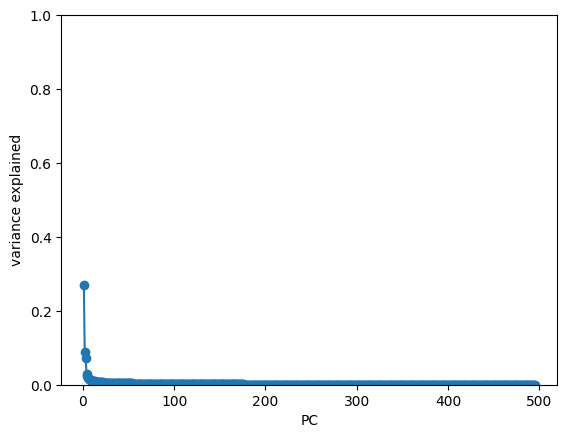

In [73]:
plt.plot(range(1, len(variance_explained)+1), variance_explained, 'o-')
plt.ylim(0,1)
plt.xlabel('PC')
plt.ylabel('variance explained')

Plot the Density of States

Text(0.5, 0, 'Density Of States')

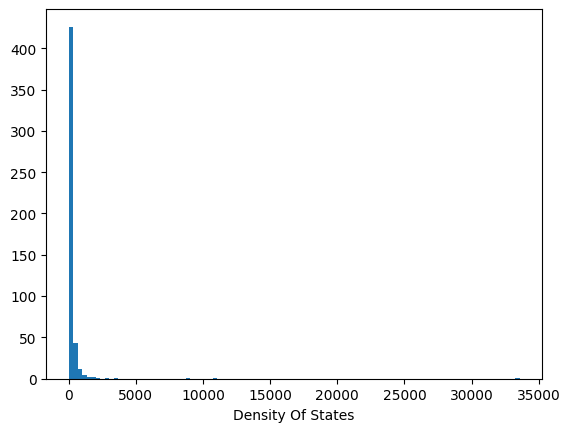

In [74]:
plt.hist(l, bins=100)
plt.xlabel('Density Of States')

Calculate the Eigenportfolio Returns

In [75]:
F = pd.DataFrame(w_prime)
F = F.divide(R.std(axis=0).to_numpy(), axis = 1)
print(F)
print(R)

F = F @ R.T.to_numpy()
F = F.T

          0         1         2         3         4         5         6    \
0    3.350088  0.561667 -5.219486  3.271779 -8.304727 -3.559129  2.363923   
1    4.832584  0.024732 -1.025111  5.553874  2.502718 -2.982074 -0.632543   
2    1.468777 -4.327525 -0.078907  2.776351  1.494767  2.784701 -1.630662   
3    2.641511 -1.219342 -1.596658  1.179206  0.883317  6.343973  1.237301   
4    4.719117 -3.195295 -0.047419  1.664991  0.354006  0.879646  2.329195   
..        ...       ...       ...       ...       ...       ...       ...   
490  5.360163 -0.485524  1.005156  5.276688  2.077619 -4.024489  0.734721   
491  3.962188 -1.339387 -1.365884 -2.261866  2.360511 -1.389592  2.107306   
492  4.009952 -2.161481  4.520636  1.667941 -1.751375 -1.581058 -1.426774   
493  4.082491 -0.144552 -0.313584 -6.088925  3.645045  1.417895  0.620990   
494  2.935198 -5.080634  1.062644  1.341660  3.391801  1.898569  1.500700   

          7         8         9    ...       485        486       487  \
0 

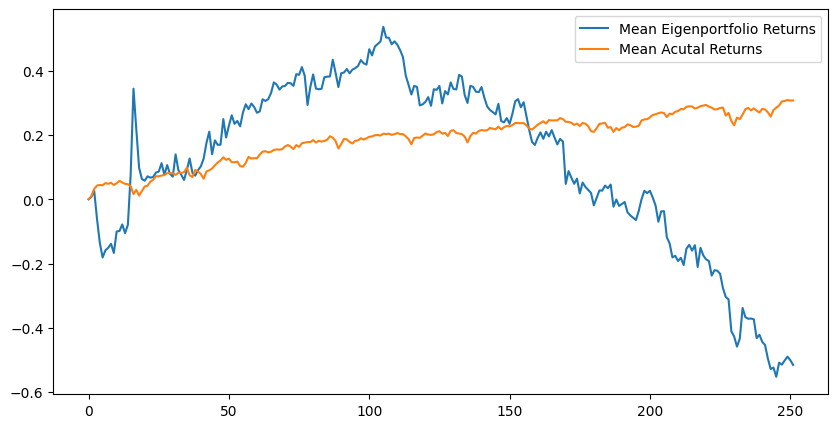

In [76]:
FM = F.mean(axis=1)
RM = R.mean(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(FM.cumsum(),  label="Mean Eigenportfolio Returns")
ax.plot(RM.cumsum(), label = "Mean Acutal Returns")
plt.legend()

Plot The First Eigenvector

Top 10 Stocks
    Symbol                  Security             GICS Sector
12    AKAM                    Akamai  Information Technology
30     AWK      American Water Works               Utilities
47       T                      AT&T  Communication Services
69      BA                    Boeing             Industrials
137    CMI                   Cummins             Industrials
143   DECK            Deckers Brands  Consumer Discretionary
187   EXPD  Expeditors International             Industrials
199     FE               FirstEnergy               Utilities
249   ILMN                  Illumina             Health Care
502    ZTS                    Zoetis             Health Care

Bottom 10 Stocks
    Symbol            Security             GICS Sector
4      ACN           Accenture  Information Technology
32     AME              Ametek             Industrials
77     BRO       Brown & Brown              Financials
148   FANG  Diamondback Energy                  Energy
154    DPZ            

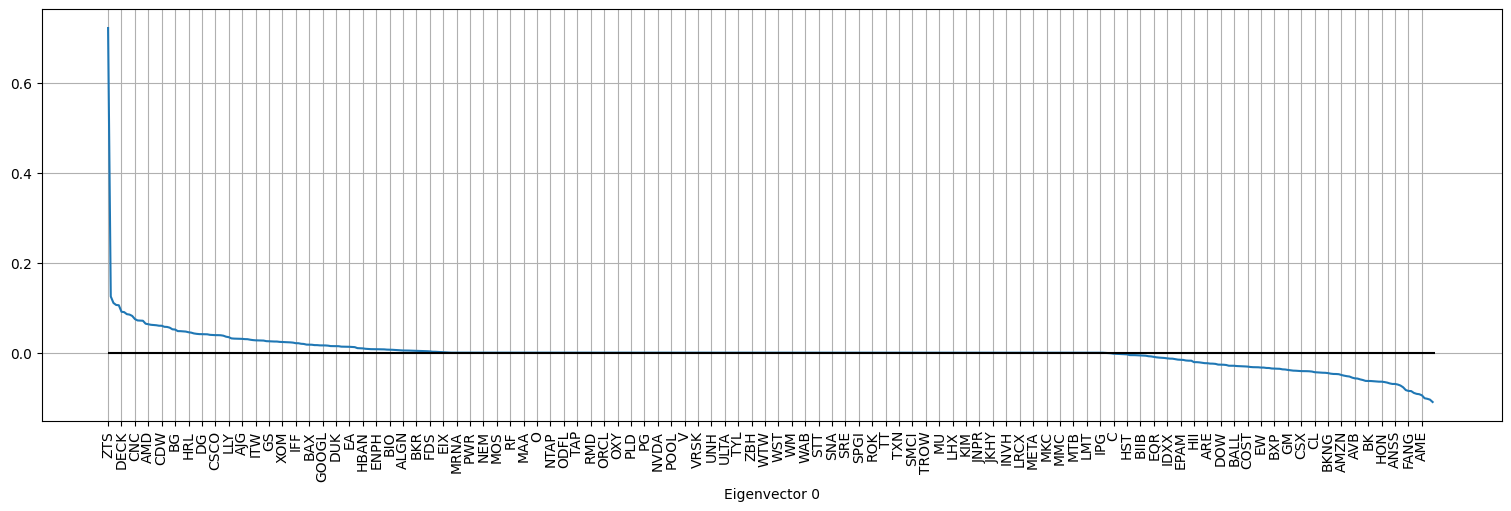

In [77]:
plot_eigenportfolio(0)


Plot the Second Eigenvector

Top 10 Stocks
    Symbol                    Security             GICS Sector
29     AMT              American Tower             Real Estate
63     BBY                    Best Buy  Consumer Discretionary
106     CB               Chubb Limited              Financials
189    XOM                  ExxonMobil                  Energy
240    HPQ                     HP Inc.  Information Technology
241   HUBB        Hubbell Incorporated             Industrials
252   PODD                     Insulet             Health Care
418    SJM  J.M. Smucker Company (The)        Consumer Staples
438    TGT          Target Corporation        Consumer Staples
494    WMB          Williams Companies                  Energy

Bottom 10 Stocks
    Symbol                      Security             GICS Sector
28     AIG  American International Group              Financials
56    BALL              Ball Corporation               Materials
71     BWA                    BorgWarner  Consumer Discretionary
109   CINF     

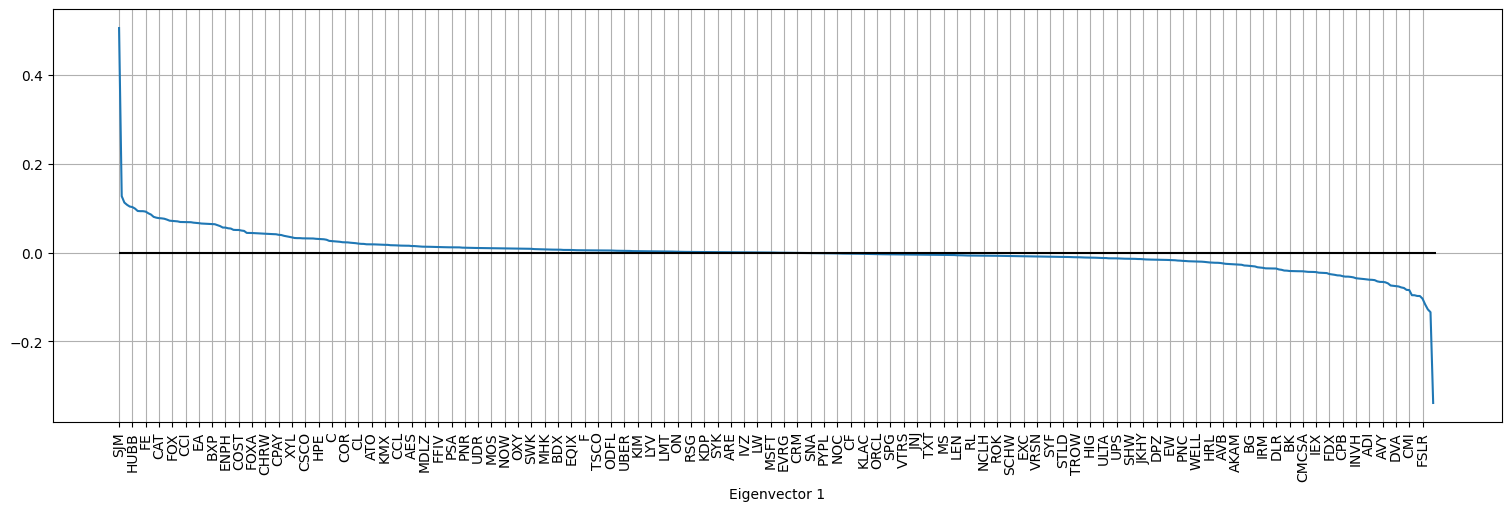

In [78]:
plot_eigenportfolio(1)

Plot the Third Eigenvector

Top 10 Stocks
    Symbol                      Security             GICS Sector
27     AXP              American Express              Financials
34     APH                      Amphenol  Information Technology
48     ATO                  Atmos Energy               Utilities
95      CE                      Celanese               Materials
180     EL  Estée Lauder Companies (The)        Consumer Staples
209   GRMN                        Garmin  Consumer Discretionary
214    GEN                   Gen Digital  Information Technology
222     GL                    Globe Life              Financials
500   ZBRA            Zebra Technologies  Information Technology
501    ZBH                 Zimmer Biomet             Health Care

Bottom 10 Stocks
    Symbol                              Security             GICS Sector
25     AAL               American Airlines Group             Industrials
54    AXON                       Axon Enterprise             Industrials
104    CVX                   Chevr

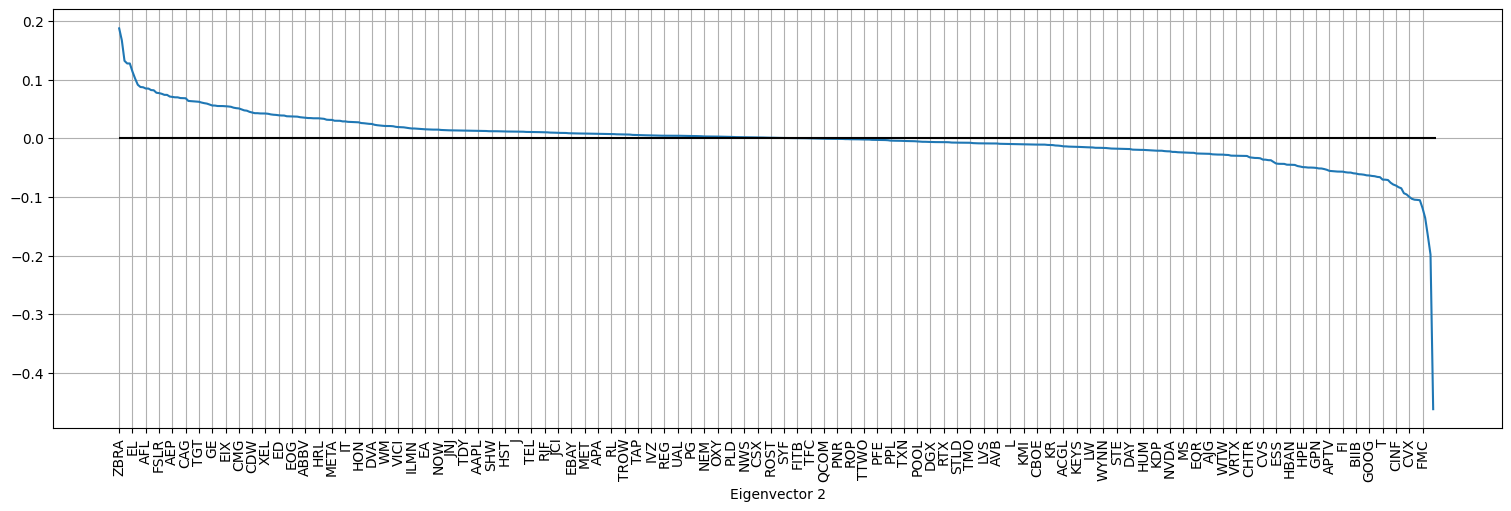

In [79]:
plot_eigenportfolio(2)

Check if the Eigenportfolio returns are uncorrelated

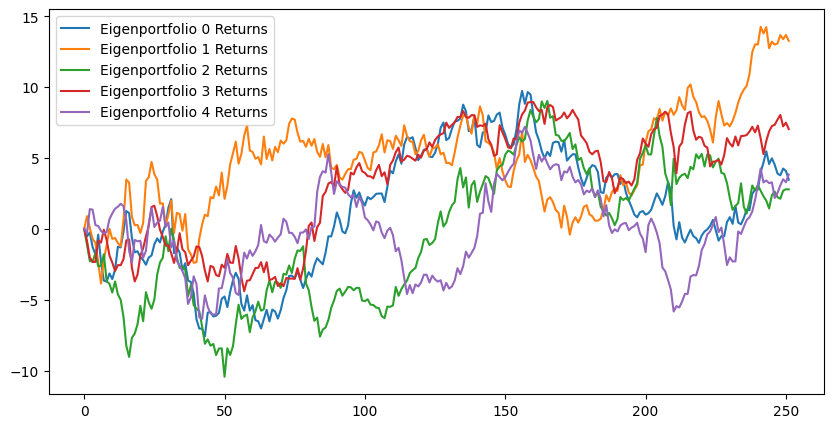

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i in range(5):
    ax.plot(F[i].cumsum(),  label=f"Eigenportfolio {i} Returns")
plt.legend()

Check if Eigenporfolio return distributions are approximately normal

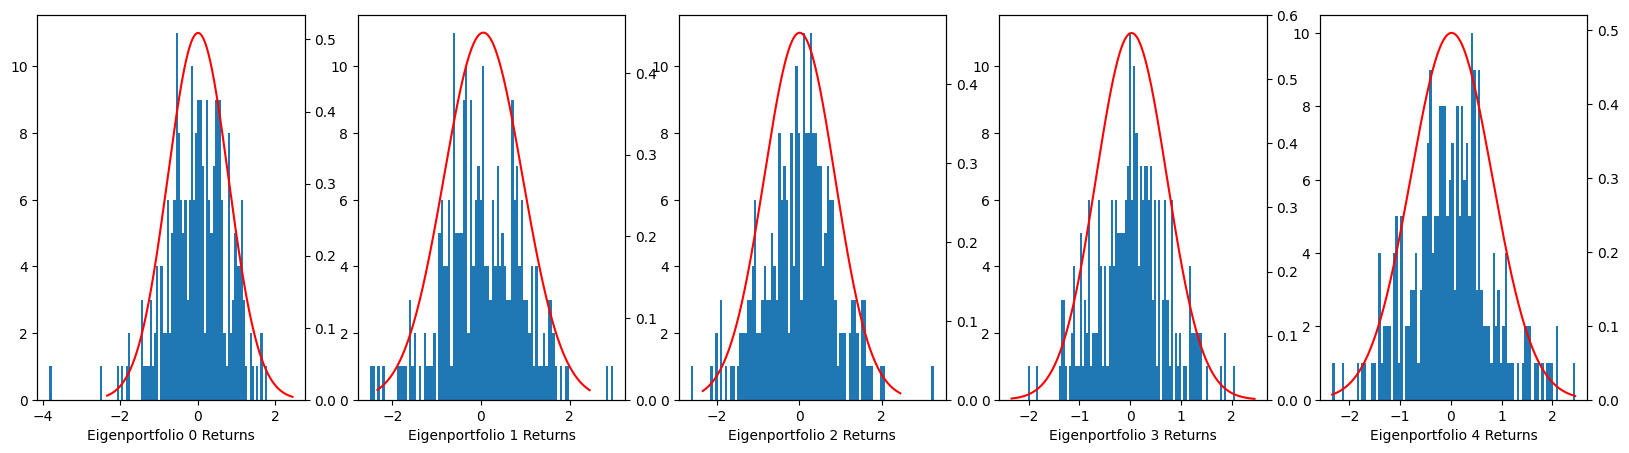

In [81]:
fig, ax = plt.subplots(1, 5, figsize=(20,5))
x =  np.linspace(F[i].min(), F[i].max(), 1000)
   
for i in range(5):
    ax[i].hist(F[i], bins=100)
    params = stats.norm.fit(F[i])
    pdf_fitted = stats.norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    ax[i].set_xlabel(f"Eigenportfolio {i} Returns")
    tx = ax[i].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)


Null Hypothesis (H₀): The datasets are not correlated (correlation coefficient = 0).<br>
Alternative Hypothesis (H₁): The datasets are correlated (correlation coefficient ≠ 0).

In [82]:
from scipy.stats import pearsonr, spearmanr, kendalltau

alpha = 0.05
p_values = {}
for i in range(5):
    for j in range(5):
        if i == j:
            pass
        else:
            # Pearson Correlation
            print(f'\nFor Eigenportfolio {i} and {j}:')
            pearson_corr, pearson_p_value = pearsonr(F[i].to_numpy(), F[j].to_numpy())

            # Interpretation
            if pearson_p_value > alpha:
                print("Pearson correlation: No significant correlation")
            else:
                print("Pearson correlation: Significant correlation")

            p_values[f'{i}-{j}'] = pearson_p_value 



For Eigenportfolio 0 and 1:
Pearson correlation: Significant correlation

For Eigenportfolio 0 and 2:
Pearson correlation: No significant correlation

For Eigenportfolio 0 and 3:
Pearson correlation: Significant correlation

For Eigenportfolio 0 and 4:
Pearson correlation: No significant correlation

For Eigenportfolio 1 and 0:
Pearson correlation: Significant correlation

For Eigenportfolio 1 and 2:
Pearson correlation: No significant correlation

For Eigenportfolio 1 and 3:
Pearson correlation: Significant correlation

For Eigenportfolio 1 and 4:
Pearson correlation: No significant correlation

For Eigenportfolio 2 and 0:
Pearson correlation: No significant correlation

For Eigenportfolio 2 and 1:
Pearson correlation: No significant correlation

For Eigenportfolio 2 and 3:
Pearson correlation: No significant correlation

For Eigenportfolio 2 and 4:
Pearson correlation: No significant correlation

For Eigenportfolio 3 and 0:
Pearson correlation: Significant correlation

For Eigenport

Do Holm's Step-Down Procedure

In [83]:
df_stat=pd.DataFrame()
df_stat['Eigenportfolio pair']=p_values.keys()
df_stat['p_value']=p_values.values()
alpha = 0.05
df_stat.sort_values(by='p_value', inplace=True) # Sort in place!
df_stat['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
# Reject Null Hypothesis = Correlated
df_stat['correlated'] = df_stat['p_value'] < df_stat['L_thresholds']
df_stat.reset_index(drop=True, inplace=True)
print(df_stat)
correlated = max(df_stat.loc[df_stat['correlated'] == True].index +1)
not_correlated = len(df_stat.index) - correlated
print(f'\nNot Correlated: {not_correlated/(correlated+not_correlated) * 100}%')

   Eigenportfolio pair       p_value  L_thresholds  correlated
0                  0-1  2.507600e-08      0.002500        True
1                  1-0  2.507600e-08      0.002632        True
2                  0-3  3.031031e-06      0.002778        True
3                  3-0  3.031031e-06      0.002941        True
4                  3-1  7.506473e-04      0.003125        True
5                  1-3  7.506473e-04      0.003333        True
6                  3-2  9.699984e-02      0.003571       False
7                  2-3  9.699984e-02      0.003846       False
8                  0-2  4.514380e-01      0.004167       False
9                  2-0  4.514380e-01      0.004545       False
10                 2-1  6.318237e-01      0.005000       False
11                 1-2  6.318237e-01      0.005556       False
12                 2-4  6.441542e-01      0.006250       False
13                 4-2  6.441542e-01      0.007143       False
14                 3-4  6.869645e-01      0.008333     

For the 1st 5 Eigenportfolios, 70% show no statistically significant correlation on returns.